# Improving Coding Efficiency - Test Your Knowledge Key

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Load the data
demographic_data <- read.csv("Module2_4/Module2_4_DemographicData.csv")
chemical_data <- read.csv("Module2_4/Module2_4_ChemicalData.csv")

In [3]:
# Viewing data
head(demographic_data)
head(chemical_data)

,ID,BMI,MAge,MEdu,BW,GA
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,1,27.7,22.99928,3,3180.058,34
2,2,26.8,30.05142,3,3210.823,43
3,3,33.2,28.04660,3,3311.551,40
4,4,30.1,34.81796,3,3266.844,32
5,5,37.4,42.68440,3,3664.088,35
6,6,33.3,24.94960,3,3328.988,40


,ID,DWAs,DWCd,DWCr,UAs,UCd,UCr
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,6.426464,1.292941,51.67987,10.192695,0.7537104,42.60187
2,2,7.832384,1.798535,50.10409,11.815088,0.9789506,41.30757
3,3,7.516569,1.288461,48.74001,10.079057,0.1903262,36.47716
4,4,5.906656,2.075259,50.92745,8.719123,0.9364825,42.47987
5,5,7.181873,2.762643,55.16882,9.436559,1.4977829,47.78528
6,6,9.723429,3.054057,51.14812,11.589403,1.6645837,38.26386


### Question 1: Are there statistically significant differences in gestational age between younger mothers (maternal age < 30 years old) and older mothers (maternal age > 30 years old)?
Before choosing a statistical test, we'll test for normality and variance.

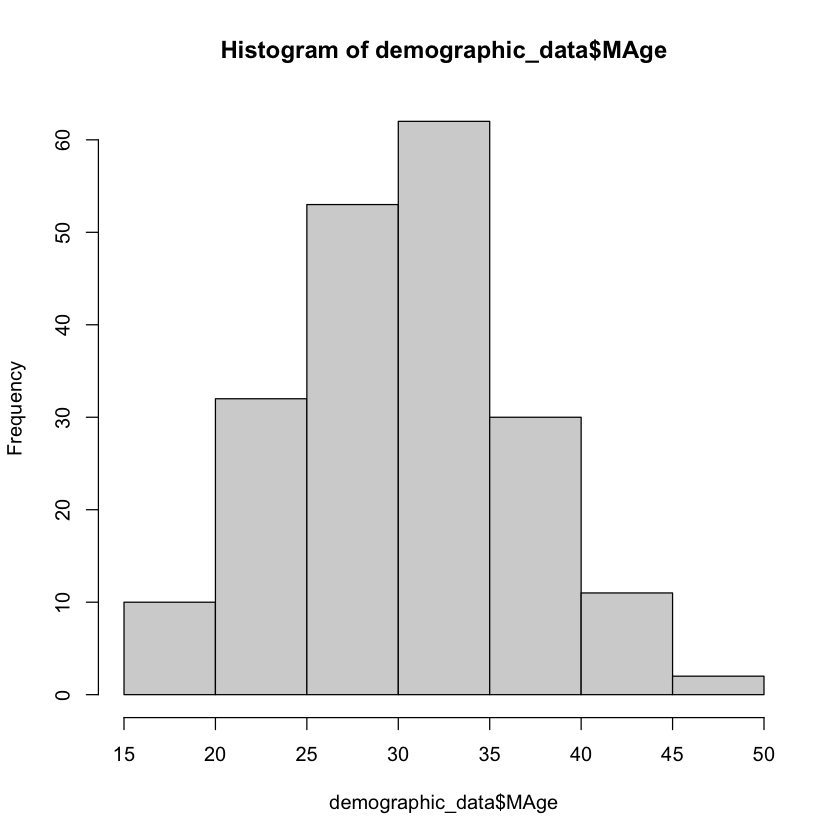

In [4]:
hist(demographic_data$MAge)

The data is relatively normally distributed, but we'll confirm with a Shapiro-Wilk test.

In [5]:
shapiro.test(demographic_data$MAge)


	Shapiro-Wilk normality test

data:  demographic_data$MAge
W = 0.99476, p-value = 0.7141


This test resulted in a p-value of 0.7141, so we cannot reject the null hypothesis (that data are normally distributed). This means that we can assume that these data are normally distributed. Next, test for the homogeneity of variances using a F-test. Start by creating a dichotomized column for maternal age.

In [6]:
demographic_data = demographic_data %>%
    # If MAge < 30 then the value in the new column will be "Y" for younger
    mutate(Dichotomized_MAge = ifelse(MAge < 30, "Y",
    # If MAge > 30 then the value in the new column will be "O" for older
                                     ifelse(MAge > 30, "O", NA)))

head(demographic_data)

,ID,BMI,MAge,MEdu,BW,GA,Dichotomized_MAge
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,1,27.7,22.99928,3,3180.058,34,Y
2,2,26.8,30.05142,3,3210.823,43,O
3,3,33.2,28.04660,3,3311.551,40,Y
4,4,30.1,34.81796,3,3266.844,32,O
5,5,37.4,42.68440,3,3664.088,35,O
6,6,33.3,24.94960,3,3328.988,40,Y


In [7]:
var.test(GA ~ Dichotomized_MAge, data = demographic_data)


	F test to compare two variances

data:  GA by Dichotomized_MAge
F = 0.96065, num df = 104, denom df = 94, p-value = 0.8396
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6447329 1.4256163
sample estimates:
ratio of variances 
         0.9606493 


This test resulted in a p-value of 0.8396, so we cannot reject the null hypothesis, meaning that the variance is the same between these two groups. Therefore, we can compute an unpaired t test since its assumptions are met. 

In [8]:
t.test(GA ~ Dichotomized_MAge, data = demographic_data)


	Welch Two Sample t-test

data:  GA by Dichotomized_MAge
t = 0.044703, df = 195.16, p-value = 0.9644
alternative hypothesis: true difference in means between group O and group Y is not equal to 0
95 percent confidence interval:
 -1.210322  1.266463
sample estimates:
mean in group O mean in group Y 
       36.53333        36.50526 


This test resulted in a p-value of 0.9644, so we cannot reject the null hypothesis, meaning that there isn't a statistically significant difference between the average gestational age between younger and older mothers.
### Question 2. Are there statistically significant differences in each drinking water chemical (ie. Arsenic levels, Cadmium levels, etc.) between younger and older mothers?

In [9]:
# Creating the combined dataframe with chemical and demographic data to answer question 2
# First changing the chemical data from a wide to long format
longer_chemical_data <- pivot_longer(chemical_data, cols = 2:7, names_to = "Chemical_Measure", 
                                    values_to = "Chemical_Concentration")
demographic_chemical_data <- inner_join(demographic_data, longer_chemical_data) 

head(demographic_chemical_data)

Joining, by = "ID"


,ID,BMI,MAge,MEdu,BW,GA,Dichotomized_MAge,Chemical_Measure,Chemical_Concentration
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,1,27.7,22.99928,3,3180.058,34,Y,DWAs,6.4264644
2,1,27.7,22.99928,3,3180.058,34,Y,DWCd,1.2929409
3,1,27.7,22.99928,3,3180.058,34,Y,DWCr,51.6798741
4,1,27.7,22.99928,3,3180.058,34,Y,UAs,10.1926949
5,1,27.7,22.99928,3,3180.058,34,Y,UCd,0.7537104
6,1,27.7,22.99928,3,3180.058,34,Y,UCr,42.6018701


In [10]:
# Creating a vector that contains each unique chemical measurment
# The loop will iterate through each of the 6 measurements in this vector
unique_chemicals = unique(demographic_chemical_data$Chemical_Measure)
unique_chemicals

[1] "DWAs" "DWCd" "DWCr" "UAs"  "UCd"  "UCr"

In [11]:
# Creating an empty df to store the values
t_test_df = data.frame()

# Using a 'for' loop 
for (i in 1:length(unique_chemicals)){
    
    # Filtering the dataframe to only contain the chemical measurement of interest
    filtered_df = demographic_chemical_data %>%
        filter(Chemical_Measure == unique_chemicals[i])
    
    # T test
    t_test = t.test(Chemical_Concentration ~ Dichotomized_MAge, data = filtered_df)
    
    # Extracting the t statistic and p value
    t_test_values = cbind(unique_chemicals[i], t_test$statistic, t_test$p.value)
    
    # Putting the values into the empty dataframe
    t_test_df = rbind(t_test_df, t_test_values)
}

# Adding column names
colnames(t_test_df) = c("Chemical_Measure", "Statistic", "P Value")
t_test_df

,Chemical_Measure,Statistic,P Value
,<chr>,<chr>,<chr>
t,DWAs,-1.23118302553419,0.219799910916904
t1,DWCd,0.408081997726975,0.68365710816374
t2,DWCr,-1.55321258721513,0.121971713374039
t3,UAs,-1.09710080168611,0.273981318747344
t4,UCd,-0.51626379068317,0.606246259633572
t5,UCr,-0.113148993715661,0.910027295140406


All of the p values > 0.05, therefore there weren't any differences between any of the chemical measure concentrations and dichotomized maternal age. 

NOTE TO LAUREN: I could put this loop into a function like I did in the acutal module, but you wouldn't actually want to do that when coding. I could leave this loop above as it is a mention that a real scenario in which the loop could be put into a function like if you had a similar dataset that you wanted to run t tests on. I'd just like to know your thoughts if I should also put this loop into a function too/ how to make this concept more clear.